**Name: Sajan Arora**

#**Binary Classification of Funny one-liners**#

**Scraping Humorous Jokes from onelinefun.com**

In [1]:
import requests
from bs4 import BeautifulSoup

def scrape_all_jokes(base_url="https://onelinefun.com/"):
    # Setting the file path for saving the jokes
    jokes_file_path = "humorous_jokes.txt"
    # Initializing the page number from which scraping starts
    page_number = 1
    # Initializing a counter to track the number of jokes scraped
    total_jokes = 0

    with open(jokes_file_path, "w") as file:
        while True:
            full_url = f"{base_url}{page_number}/"
            print(f"Scraping {full_url}")
            # Send a GET request to the server to fetch the page content
            response = requests.get(full_url)
            
            # Check if the request was successful (status code 200)
            if response.status_code == 200:
                # Parse the HTML content using BeautifulSoup
                soup = BeautifulSoup(response.content, 'html.parser')
                # Find all joke elements in the page
                joke_elements = soup.find_all('div', class_='o')
                
                # Check if any jokes were found; if not, exit the loop
                if not joke_elements:  
                    print("No more jokes found. Ending scrape.")
                    break
                    
                # Iterate over each joke element found
                for element in joke_elements:
                    # Extract the text from each joke element, strip any leading whitespace
                    joke_text = element.get_text().strip() if element else ''
                    # Write the joke to the file, followed by two new lines for readability
                    file.write(joke_text + "\n\n")
                    total_jokes += 1
            else:
                # Log an error if the page request failed and exit the loop
                print(f"Failed to retrieve jokes from page {page_number}: Status code {response.status_code}")
                break
                
            # Increment the page number to scrape the next page in the next iteration
            page_number += 1  

        print(f"Total jokes scraped: {total_jokes}")

scrape_all_jokes()

Scraping https://onelinefun.com/1/
Scraping https://onelinefun.com/2/
Scraping https://onelinefun.com/3/
Scraping https://onelinefun.com/4/
Scraping https://onelinefun.com/5/
Scraping https://onelinefun.com/6/
Scraping https://onelinefun.com/7/
Scraping https://onelinefun.com/8/
Scraping https://onelinefun.com/9/
Scraping https://onelinefun.com/10/
Scraping https://onelinefun.com/11/
Scraping https://onelinefun.com/12/
Scraping https://onelinefun.com/13/
Scraping https://onelinefun.com/14/
Scraping https://onelinefun.com/15/
Scraping https://onelinefun.com/16/
Scraping https://onelinefun.com/17/
Scraping https://onelinefun.com/18/
Scraping https://onelinefun.com/19/
Scraping https://onelinefun.com/20/
Scraping https://onelinefun.com/21/
Scraping https://onelinefun.com/22/
Scraping https://onelinefun.com/23/
Scraping https://onelinefun.com/24/
Scraping https://onelinefun.com/25/
Scraping https://onelinefun.com/26/
Scraping https://onelinefun.com/27/
Scraping https://onelinefun.com/28/
S

**Loading Data from Text Files and Wikipedia Using NLTK and Requests**

In [2]:
import requests
import nltk

# Function to download necessary NLTK models if not already present
def ensure_nltk_models(model_list):
    for model in model_list:
        nltk.download(model, quiet=True)

# Initial NLTK model setup
ensure_nltk_models(['punkt'])

def load_data_from_file(file_path, file_type='text'):
    """Generic function to load data from a text file or fetch sentences from Wikipedia."""
    if file_type == 'text':
        try:
            with open(file_path, 'r', encoding='utf-8') as file:
                data = [line.strip() for line in file if line.strip()]
            print(f"Loaded {len(data)} items from file.")
            return data
        except FileNotFoundError:
            print(f"{file_path} not found.")
            return []
    elif file_type == 'wikipedia':
        headers = {'User-Agent': 'My NLP Project/1.0 (project@project.com)'}
        try:
            response = requests.get(file_path, headers=headers)
            # Ensures that HTTP errors are caught
            response.raise_for_status()  
            summary = response.json().get('extract', '')
            sentences = nltk.sent_tokenize(summary)
            return sentences
        except requests.exceptions.RequestException as e:
            print(f"Request error: {e}")
            return []
        except Exception as e:
            print(f"An unexpected error occurred: {e}")
            return []

proverbs = load_data_from_file('english_proverbs.txt')
headlines = load_data_from_file('reuters_headlines.txt')
wikipedia_sentences = load_data_from_file('https://en.wikipedia.org/api/rest_v1/page/summary/Humor', file_type='wikipedia')

Loaded 2039 items from file.
Loaded 2707 items from file.


**Preprocessing: Tokenization, Normalization, Remove Stop Words, Lemmatization and Dataset Handling for NLP**

In [3]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob  # Sentiment analysis library
import pickle
import string 

nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

def preprocess_text(text):
    """
    Preprocess a given text by tokenizing, removing stop words, and lemmatization.
    
    Parameters:
    text (str): The text to preprocess.

    Returns:
    str: The preprocessed text.
    """
    # Tokenize the text and convert to lower case
    tokens = word_tokenize(text.lower())
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words and w.isalpha()]

    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(w) for w in tokens]

    # Re-join the tokens into a string and return
    return ' '.join(lemmatized_tokens)

def read_from_pickle(filename):
    """Load data from a pickle file."""
    with open(filename, 'rb') as f:
        data = pickle.load(f)
    return data

def read_from_text(filename):
    """Read data from a text file."""
    with open(filename, 'r') as f:
        data = f.readlines()
    return data

def preprocess_dataset(dataset):
    """
    Preprocess each text entry in the dataset.
    
    Parameters:
    dataset (list): A list of text entries to preprocess.

    Returns:
    list: A list of preprocessed text entries.
    """
    return [preprocess_text(text) for text in dataset]

def detect_sarcasm(text):
    """
    Detect sarcasm by comparing sentiment polarity with the literal meaning.
    
    Parameters:
    text (str): The text to analyze.

    Returns:
    bool: True if the text is sarcastic, False otherwise.
    """
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity < -0.5:
        return True
    else:
        return False

def write_to_pickle(filename, data):
    """Save data to a pickle file."""
    with open(filename + '.pickle', 'wb') as f:
        pickle.dump(data, f)

if __name__ == "__main__":
    # Load datasets
    proverbs = load_data_from_file('english_proverbs.txt')
    headlines = load_data_from_file('reuters_headlines.txt')
    wikipedia_sentences = load_data_from_file('https://en.wikipedia.org/api/rest_v1/page/summary/Humor', file_type='wikipedia')

    # Preprocess each dataset
    preprocessed_proverbs = preprocess_dataset(proverbs)
    preprocessed_headlines = preprocess_dataset(headlines)
    preprocessed_wikipedia_sentences = preprocess_dataset(wikipedia_sentences)

    # Combine the non-humorous datasets
    combined_non_humorous_texts = preprocessed_proverbs + preprocessed_headlines + preprocessed_wikipedia_sentences

    # Save the combined non-humorous dataset to a pickle file
    write_to_pickle("combined_non_humorous_texts", combined_non_humorous_texts)
    print("Combined non-humorous dataset created and saved.")

    # Load, preprocess, and detect sarcasm in humorous texts
    humorous_texts = read_from_text("humorous_jokes.txt")
    preprocessed_humorous_texts = preprocess_dataset(humorous_texts)
    sarcasm_labels = [detect_sarcasm(text) for text in preprocessed_humorous_texts]

    # Merge preprocessed texts with sarcasm labels
    humorous_texts_with_labels = [(text, label) for text, label in zip(preprocessed_humorous_texts, sarcasm_labels)]

    # Save the preprocessed humorous texts with labels to a pickle file
    write_to_pickle("preprocessed_humorous_texts_with_labels", humorous_texts_with_labels)
    print("Preprocessed humorous texts with sarcasm labels saved.")


Loaded 2039 items from file.
Loaded 2707 items from file.
Combined non-humorous dataset created and saved.
Preprocessed humorous texts with sarcasm labels saved.


**Exploratory Data Analysis (EDA)**

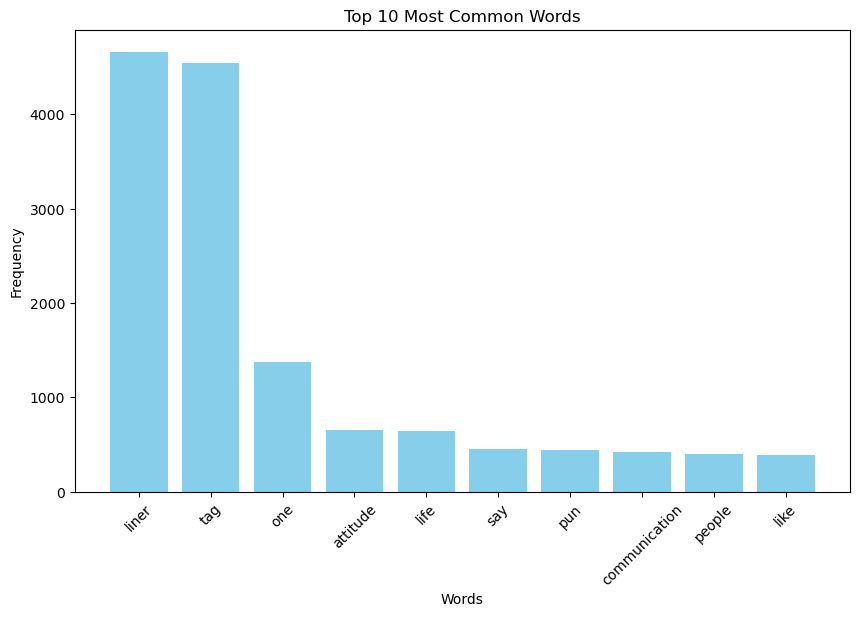

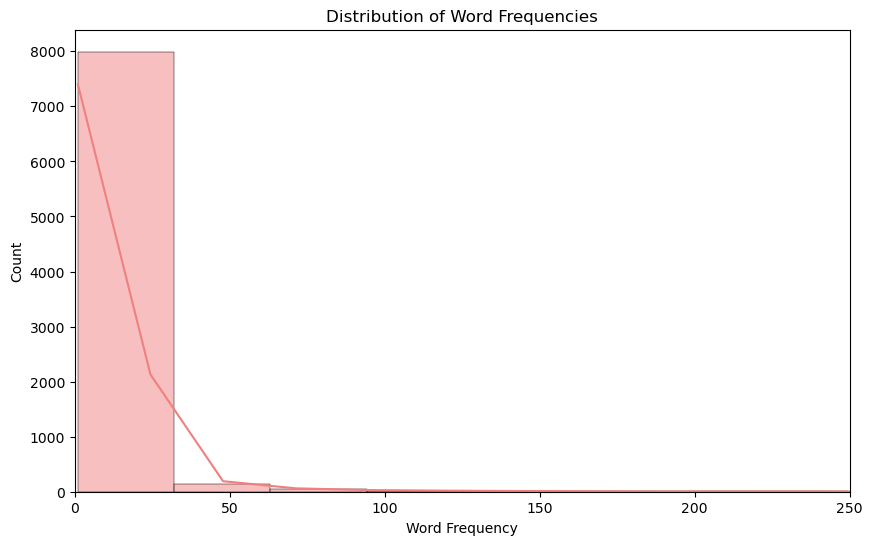

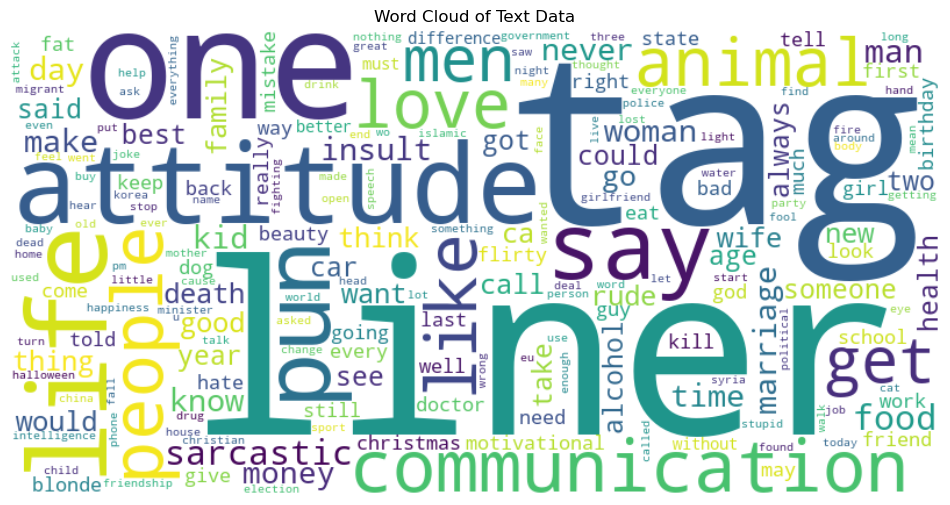

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import pickle

# Load datasets from pickle files
def load_data_from_pickle(filename):
    with open(filename, 'rb') as file:
        return pickle.load(file)
    
non_humorous_texts = load_data_from_pickle('combined_non_humorous_texts.pickle')
humorous_texts_with_labels = load_data_from_pickle('preprocessed_humorous_texts_with_labels.pickle')

# Extract just the texts from the humorous_texts_with_labels (ignore labels since we know these are all humorous)
humorous_texts = [text for text, label in humorous_texts_with_labels]

# Create labels for the combined dataset
labels = [1] * len(humorous_texts) + [0] * len(non_humorous_texts)
all_texts = humorous_texts + non_humorous_texts

# Split the preprocessed texts into words
words = [word for text in all_texts for word in text.split() if word.isalpha()]
word_counts = Counter(words)

# Display the top 10 most common words
most_common_words = word_counts.most_common(10)
words, frequencies = zip(*most_common_words)

plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words')
plt.xticks(rotation=45)
plt.show()

# Plot the distribution of word frequencies
plt.figure(figsize=(10, 6))
sns.histplot(list(word_counts.values()), bins=150, kde=True, color='lightcoral')
plt.xlim(0, 250)
plt.xlabel('Word Frequency')
plt.ylabel('Count')
plt.title('Distribution of Word Frequencies')
plt.show()

# Generate and display a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Text Data')
plt.show()


**Vectorization**

In [5]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

texts =all_texts
# Vectorize the text
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(texts)
y = labels

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Baseline Model: Dummy Classifier**

Baseline Model Accuracy: 0.6722807017543859


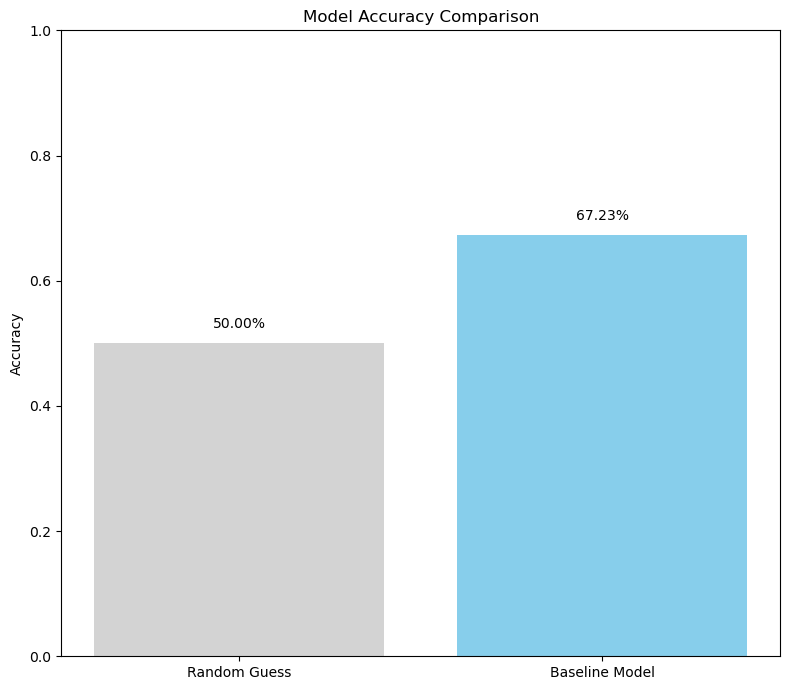

In [6]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Define the baseline model using the most frequent strategy
baseline_model = DummyClassifier(strategy='most_frequent')

# Fit the baseline model on the training data
baseline_model.fit(X_train, y_train)

# Make predictions on the test data
baseline_predictions = baseline_model.predict(X_test)

# Evaluate the accuracy of the baseline model
baseline_accuracy = accuracy_score(y_test, baseline_predictions)
print("Baseline Model Accuracy:", baseline_accuracy)

random_guess_accuracy = 0.5

# Data to plot
accuracies = [random_guess_accuracy, baseline_accuracy]
plot_labels = ['Random Guess', 'Baseline Model']

# Create a bar plot to compare accuracies
plt.figure(figsize=(8, 7))
plt.bar(plot_labels, accuracies, color=['lightgray', 'skyblue'])

# Add title and labels
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1.0)

# Display the accuracy on top of the bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f"{acc:.2%}", ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

**Naive Bayes Classifier**


Naive Bayes Classifier
Accuracy: 0.7933333333333333
              precision    recall  f1-score   support

           0       0.99      0.37      0.54       934
           1       0.77      1.00      0.87      1916

    accuracy                           0.79      2850
   macro avg       0.88      0.69      0.70      2850
weighted avg       0.84      0.79      0.76      2850



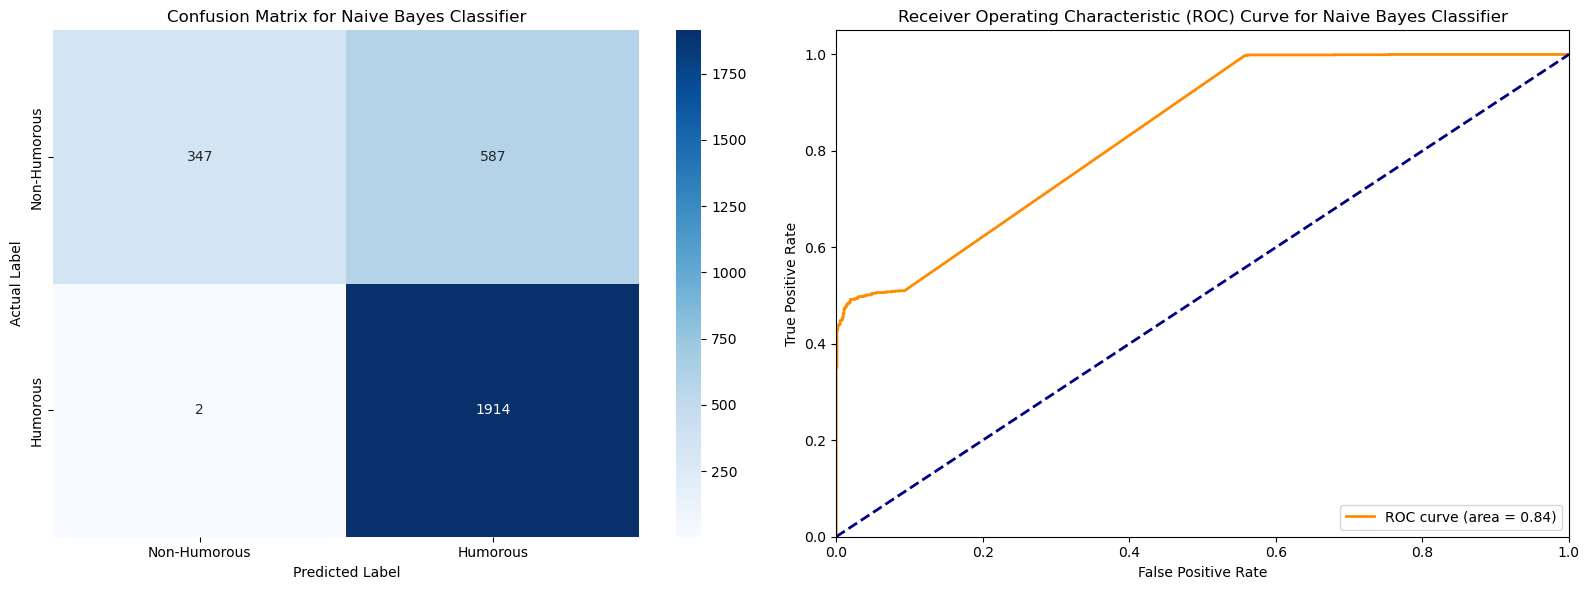

In [7]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Initialize and train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Evaluating the model with predictions
nb_predictions = nb_classifier.predict(X_test)
print("Naive Bayes Classifier")
print("Accuracy:", accuracy_score(y_test, nb_predictions))
print(classification_report(y_test, nb_predictions))

# Calculating the confusion matrix
conf_matrix = confusion_matrix(y_test, nb_predictions)

# Calculating probabilities for ROC curve
y_scores = nb_classifier.predict_proba(X_test)[:, 1]

# Calculating ROC metrics
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculating the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plotting both the confusion matrix and ROC curve side by side
plt.figure(figsize=(16, 6))

# Confusion Matrix
plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot 1
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Humorous', 'Humorous'], yticklabels=['Non-Humorous', 'Humorous'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label') 
plt.title('Confusion Matrix for Naive Bayes Classifier')

# ROC Curve
plt.subplot(1, 2, 2)  # 1 row, 2 columns, subplot 2
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Naive Bayes Classifier')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

**SVM Classifier**

SVM Classifier
Accuracy: 0.8133333333333334
              precision    recall  f1-score   support

           0       0.98      0.44      0.61       934
           1       0.78      1.00      0.88      1916

    accuracy                           0.81      2850
   macro avg       0.88      0.72      0.74      2850
weighted avg       0.85      0.81      0.79      2850



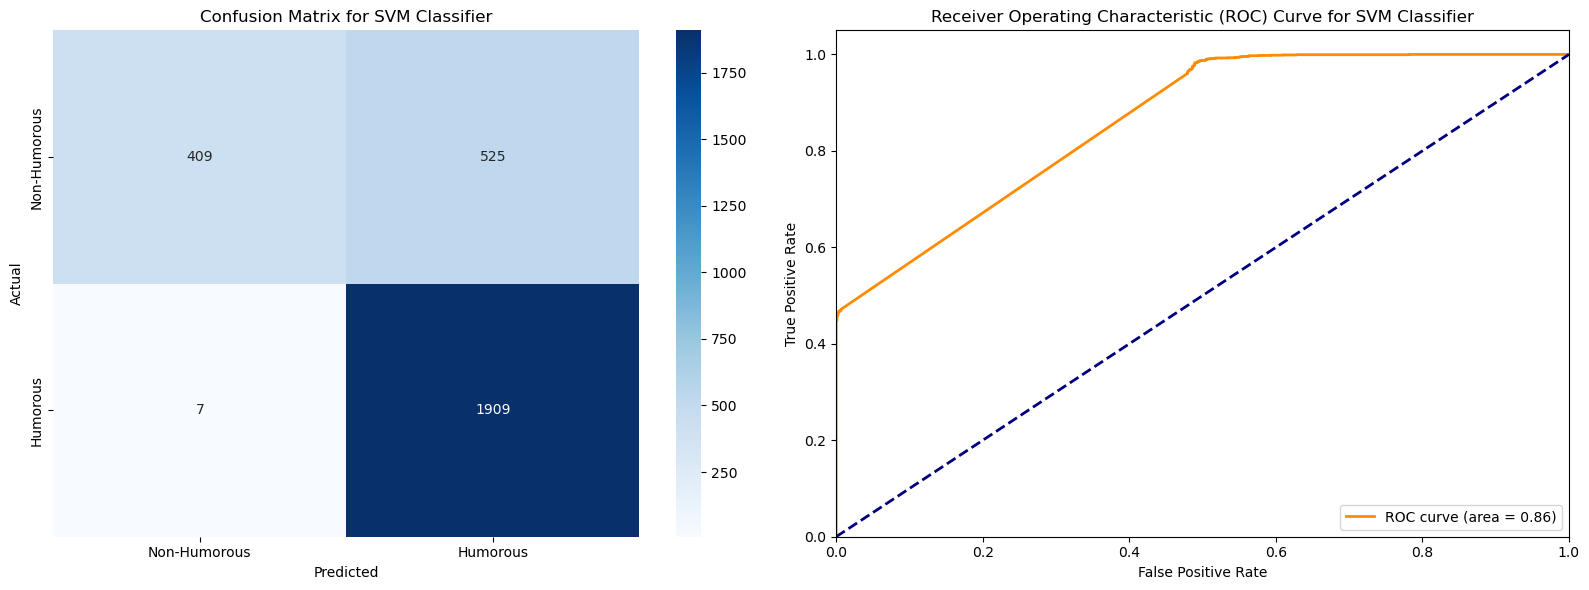

In [8]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and training the SVM classifier with probability=True
svm_classifier = SVC(kernel='linear', probability=True)
svm_classifier.fit(X_train, y_train)

# Evaluating the model with predictions
svm_predictions = svm_classifier.predict(X_test)
print("SVM Classifier")
print("Accuracy:", accuracy_score(y_test, svm_predictions))
print(classification_report(y_test, svm_predictions))

# Calculating the confusion matrix
conf_matrix = confusion_matrix(y_test, svm_predictions)

# Plot the ROC curve
y_scores = svm_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)  
roc_auc = auc(fpr, tpr)  

# Plotting both the confusion matrix and ROC curve side by side
plt.figure(figsize=(16, 6))

# Confusion Matrix
plt.subplot(1, 2, 1)  
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Humorous', 'Humorous'], yticklabels=['Non-Humorous', 'Humorous'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for SVM Classifier')

#  ROC Curve
plt.subplot(1, 2, 2) 
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVM Classifier')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

**Long Short-Term Memory**

Epoch 1/10
285/285 ━━━━━━━━━━━━━━━━━━━━ 17s 56ms/step - accuracy: 0.7313 - loss: 0.5004 - val_accuracy: 0.8105 - val_loss: 0.3689
Epoch 2/10
285/285 ━━━━━━━━━━━━━━━━━━━━ 15s 53ms/step - accuracy: 0.8225 - loss: 0.3504 - val_accuracy: 0.8092 - val_loss: 0.3606
Epoch 3/10
285/285 ━━━━━━━━━━━━━━━━━━━━ 15s 54ms/step - accuracy: 0.8241 - loss: 0.3402 - val_accuracy: 0.8105 - val_loss: 0.3573
Epoch 4/10
285/285 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - accuracy: 0.8213 - loss: 0.3326 - val_accuracy: 0.8114 - val_loss: 0.3606
Epoch 5/10
285/285 ━━━━━━━━━━━━━━━━━━━━ 14s 50ms/step - accuracy: 0.8286 - loss: 0.3255 - val_accuracy: 0.8105 - val_loss: 0.3637
Epoch 6/10
285/285 ━━━━━━━━━━━━━━━━━━━━ 15s 51ms/step - accuracy: 0.8301 - loss: 0.3264 - val_accuracy: 0.8114 - val_loss: 0.3653
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.8379 - loss: 0.3499
Test Accuracy: 0.8368421196937561


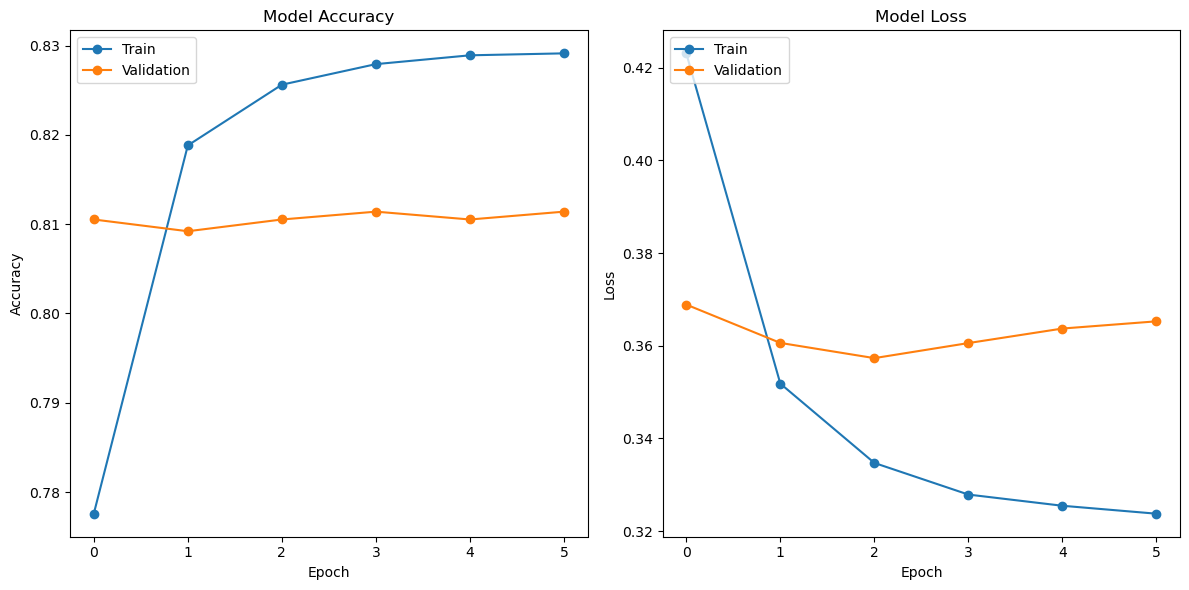

In [9]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np

# Tokenizing text
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(all_texts)
sequences = tokenizer.texts_to_sequences(all_texts)
X = pad_sequences(sequences, maxlen=100)

# Converting labels to numpy array
y = np.array(labels)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining the LSTM model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Training the model
history= model.fit(X_train, y_train, validation_split=0.2, epochs=10, callbacks=[early_stopping])

# Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')

# Plotting training & validation accuracy values with markers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], marker='o')
plt.plot(history.history['val_accuracy'], marker='o')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plotting training & validation loss values with markers
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], marker='o')
plt.plot(history.history['val_loss'], marker='o')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

**Analysis of Model Performance Based on Accuracy**

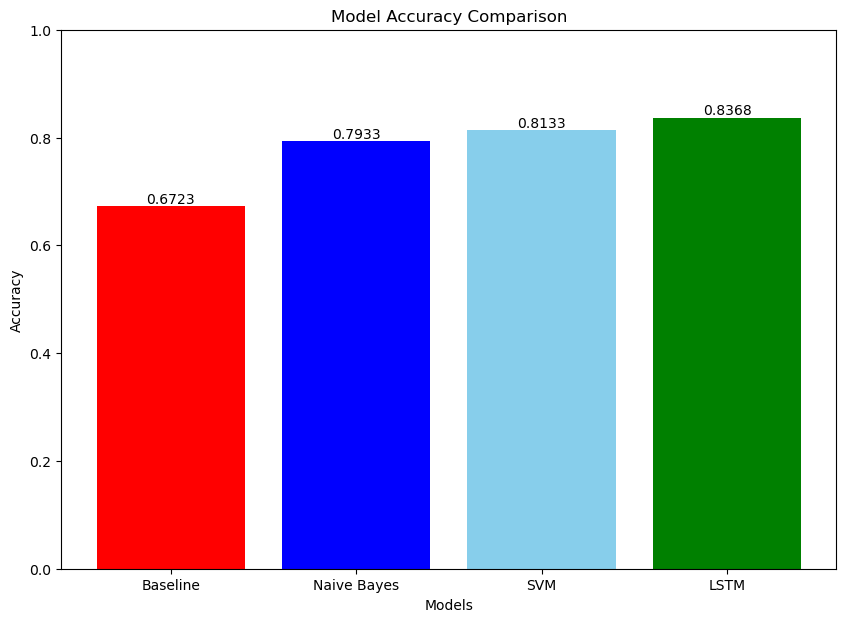

In [10]:
# Calculating the accuracy of the baseline model
baseline_accuracy = accuracy_score(y_test, baseline_predictions)

# Calculating the accuracy of the Naive Bayes model
nb_accuracy = accuracy_score(y_test, nb_predictions)

# Calculating the accuracy of the SVM (Support Vector Machine) model
svm_accuracy = accuracy_score(y_test, svm_predictions)

#Accuracy for LSTM model
lstm_accuracy = accuracy 

# List of model names for the x-axis of the plot
model_names = ['Baseline', 'Naive Bayes', 'SVM', 'LSTM']
accuracies = [baseline_accuracy, nb_accuracy, svm_accuracy, lstm_accuracy]

plt.figure(figsize=(10, 7)) 

# Creating a bar plot for the accuracies of different models
bars = plt.bar(model_names, accuracies, color=['red', 'blue', 'skyblue', 'green'])

# Adding a text label above each bar, showing the accuracy rounded to four decimal places
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{round(yval, 4)}', ha='center', va='bottom') 

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

# Setting the y-axis limit to range from 0 to 1 for better comparison of accuracy percentages
plt.ylim(0, 1) 

#show plot
plt.show()

**References**
----------

- NLTK Documentation: https://www.nltk.org/
- Scikit-learn Documentation: https://scikit-learn.org/stable/
- TensorFlow Keras Documentation: https://www.tensorflow.org/guide/keras
- Data Source for Jokes: https://onelinefun.com/
- Data Source for Proverbs: Web
- Data Source for Reuters Headlines: Web
